VISUALIZATION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import joblib


In [2]:
df=pd.read_csv('Process_data\diabetes_final_standardized.csv')  # Load the dataset
df

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Legion\AppData\Local\Temp\ipykernel_19828\247879204.py:1: SyntaxWarning: invalid escape sequence '\d'
  df=pd.read_csv('Process_data\diabetes_final_standardized.csv')  # Load the dataset


age  gender  alcohol_consumption_per_week  \
0      0.504956       1                     -1.413253   
1     -0.135884       0                     -0.707921   
2      0.633124       1                     -0.707921   
3      1.530299       0                     -1.413253   
4     -0.264052       1                     -0.707921   
...         ...     ...                           ...   
99995 -0.264052       1                     -0.707921   
99996 -0.584472       0                      0.702744   
99997  0.440872       0                      1.408076   
99998 -0.199968       0                      0.702744   
99999  0.120452       0                     -0.707921   

       physical_activity_minutes_per_week  diet_score  sleep_hours_per_day  \
0                                1.138363         5.7             0.824199   
1                                0.285376         6.7            -0.454787   
2                               -0.733470         6.4             2.742678   
3                               -0.828246         3.4            -0.363431   
4                               -0.117424         7.2             0.367418   
...                                   ...         ...                  ...   
99995                            0.202447         8.3            -0.546144   
99996                           -0.508376         8.8            -0.180719   
99997                            0.024741         9.9            -1.825130   
99998                           -0.792705         5.9            -0.272075   
99999                            1.529316         2.7            -1.459705   

       screen_time_hours_per_day  family_history_diabetes  \
0                       0.771162                        0   
1                       1.095260                        0   
2                       0.852187                        1   
3                      -0.322667                        0   
4                      -0.403691                        0   
...                          ...                      ...   
99995                  -0.606252                        0   
99996                  -0.484715                        0   
99997                   0.041943                        0   
99998                  -2.226739                        0   
99999                  -0.201130                        0   

       hypertension_history  cardiovascular_history  ...  \
0                         0                       0  ...   
1                         0                       0  ...   
2                         0                       0  ...   
3                         0                       0  ...   
4                         0                       0  ...   
...                     ...                     ...  ...   
99995                     0                       0  ...   
99996                     0                       0  ...   
99997                     0                       1  ...   
99998                     1                       0  ...   
99999                     0                       0  ...   

       employment_status_Student  employment_status_Unemployed  \
0                              0                             0   
1                              0                             0   
2                              0                             1   
3                              0                             0   
4                              0                             0   
...                          ...                           ...   
99995                          0                             1   
99996                          0                             0   
99997                          0                             0   
99998                          0                             0   
99999                          0                             0   

       smoking_status_Former  smoking_status_Never  bmi_category_Obese  \
0                          0                     1                   

## 🧠 Health & Lifestyle Insights

<>:6: SyntaxWarning: invalid escape sequence '\d'
<>:6: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Legion\AppData\Local\Temp\ipykernel_19828\1209978124.py:6: SyntaxWarning: invalid escape sequence '\d'
  df=pd.read_csv('Process_data\diabetes_final_standardized.csv')


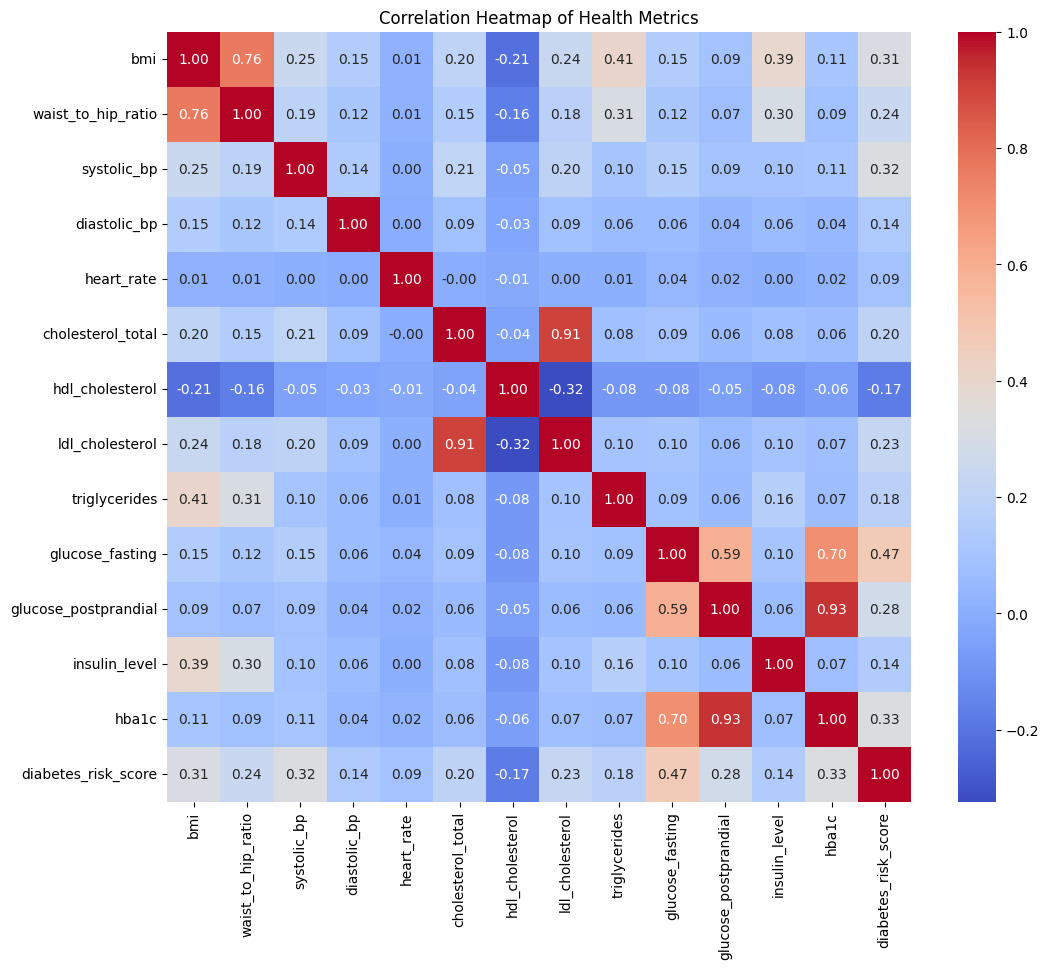

In [3]:
#To reveal how strongly continuous health metrics are related to each other and to diabetes risk.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv('Process_data\diabetes_final_standardized.csv')  

# Select continuous health variables
continuous_vars = [
    'bmi', 'waist_to_hip_ratio', 'systolic_bp', 'diastolic_bp', 'heart_rate',
    'cholesterol_total', 'hdl_cholesterol', 'ldl_cholesterol', 'triglycerides',
    'glucose_fasting', 'glucose_postprandial', 'insulin_level', 'hba1c',
    'diabetes_risk_score'
]

plt.figure(figsize=(12, 10))
corr_matrix = df[continuous_vars].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Health Metrics')
plt.show()


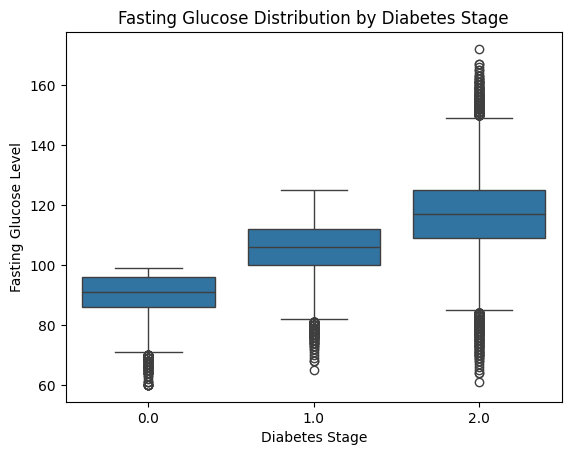

In [4]:
#To compare the distribution and spread of glucose levels across different diabetes stages. Great for spotting outliers and variability.

sns.boxplot(x='diabetes_stage', y='glucose_fasting', data=df)
plt.title('Fasting Glucose Distribution by Diabetes Stage')
plt.xlabel('Diabetes Stage')
plt.ylabel('Fasting Glucose Level')
plt.show()


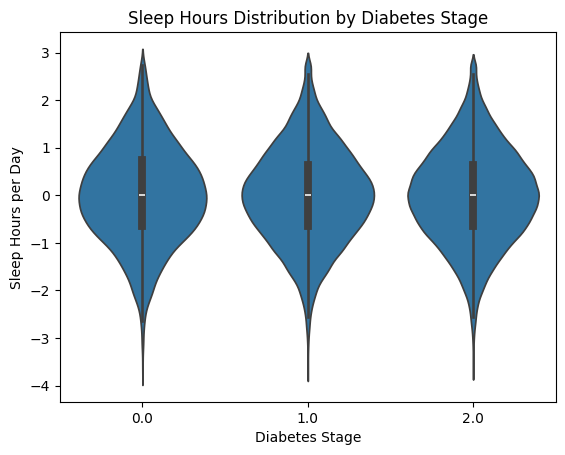

In [5]:
#To visualize both the distribution and density of sleep hours across diabetes stages. Combines boxplot and KDE for richer insight.
sns.violinplot(x='diabetes_stage', y='sleep_hours_per_day', data=df)
plt.title('Sleep Hours Distribution by Diabetes Stage')
plt.xlabel('Diabetes Stage')
plt.ylabel('Sleep Hours per Day')
plt.show()


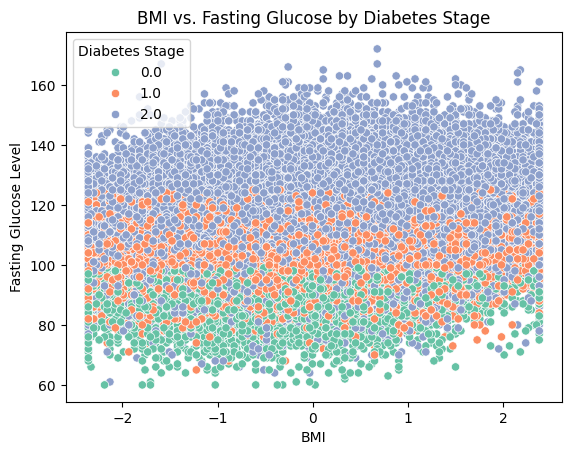

In [6]:
#To explore relationships between two variables (e.g., BMI and glucose) and highlight clustering by diabetes stage.
sns.scatterplot(x='bmi', y='glucose_fasting', hue='diabetes_stage', data=df, palette='Set2')
plt.title('BMI vs. Fasting Glucose by Diabetes Stage')
plt.xlabel('BMI')
plt.ylabel('Fasting Glucose Level')
plt.legend(title='Diabetes Stage')
plt.show()


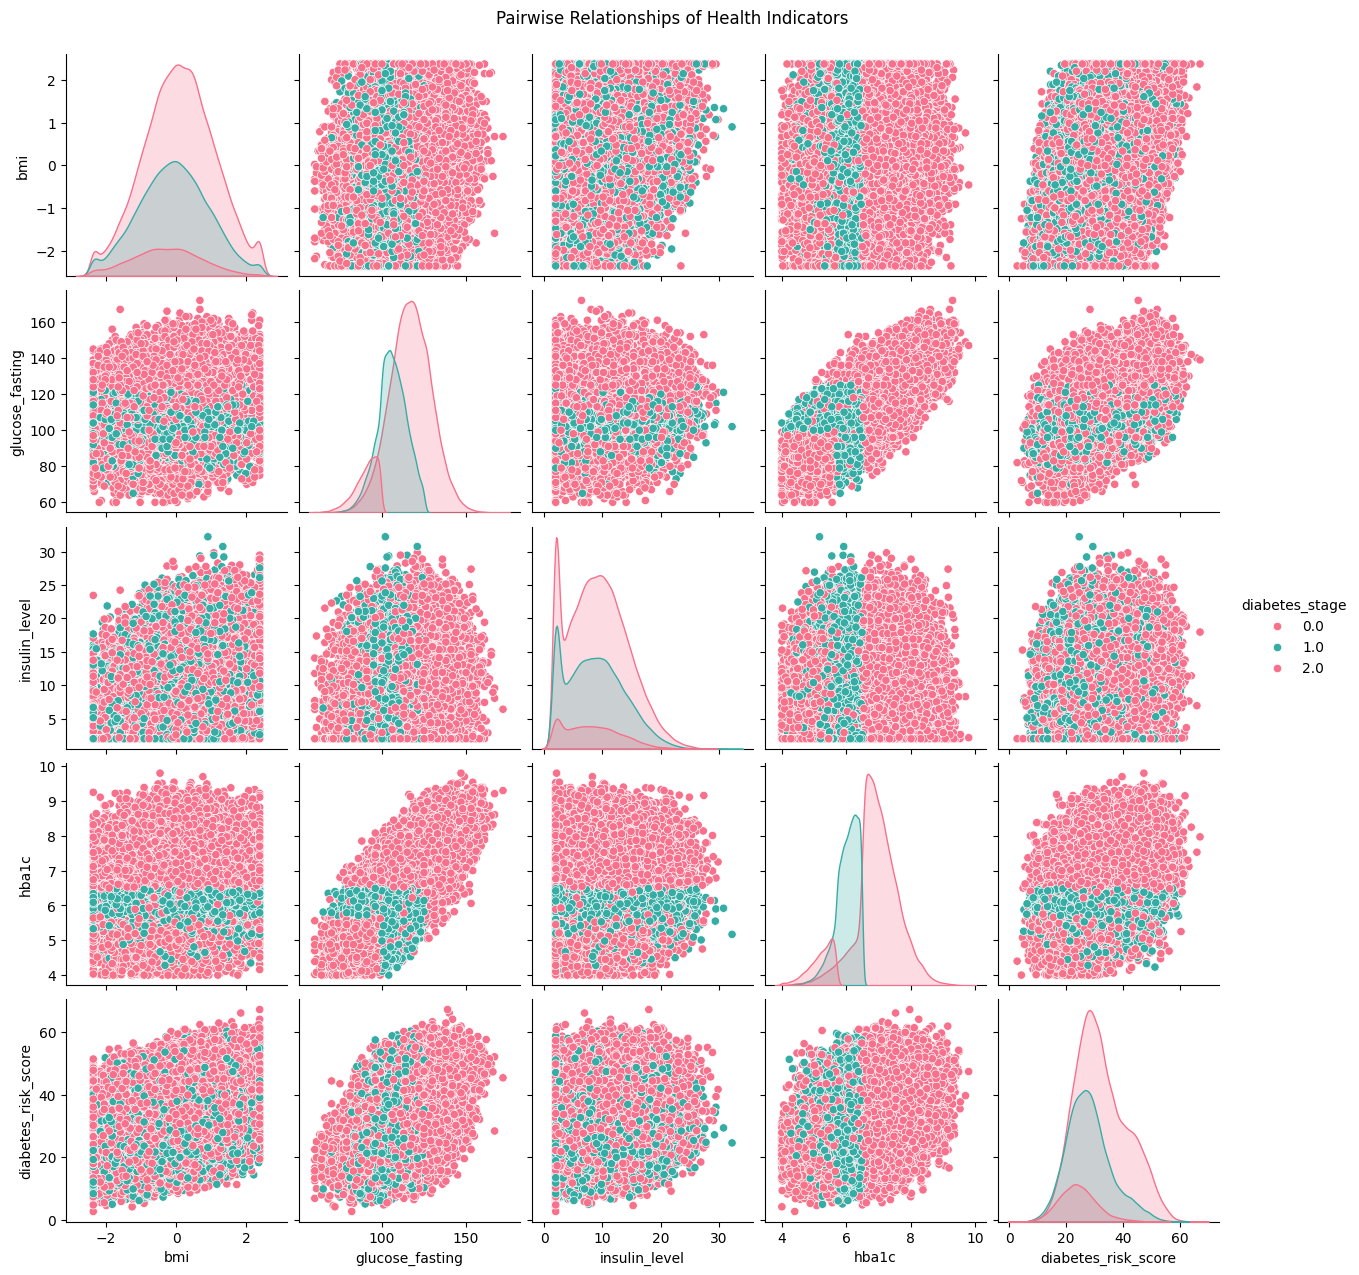

In [7]:
#To explore pairwise relationships among multiple health indicators and detect patterns or clusters across diabetes stages.
selected_vars = ['bmi', 'glucose_fasting', 'insulin_level', 'hba1c', 'diabetes_risk_score']
sns.pairplot(df[selected_vars + ['diabetes_stage']], hue='diabetes_stage', palette='husl')
plt.suptitle('Pairwise Relationships of Health Indicators', y=1.02)
plt.show()


## 🧬 Diabetes Risk & Progression

<>:7: SyntaxWarning: invalid escape sequence '\d'
<>:7: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Legion\AppData\Local\Temp\ipykernel_19828\1173409742.py:7: SyntaxWarning: invalid escape sequence '\d'
  df=pd.read_csv('Process_data\diabetes_final_standardized.csv')
C:\Users\Legion\AppData\Local\Temp\ipykernel_19828\1173409742.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='diabetes_stage', data=df, palette='viridis')


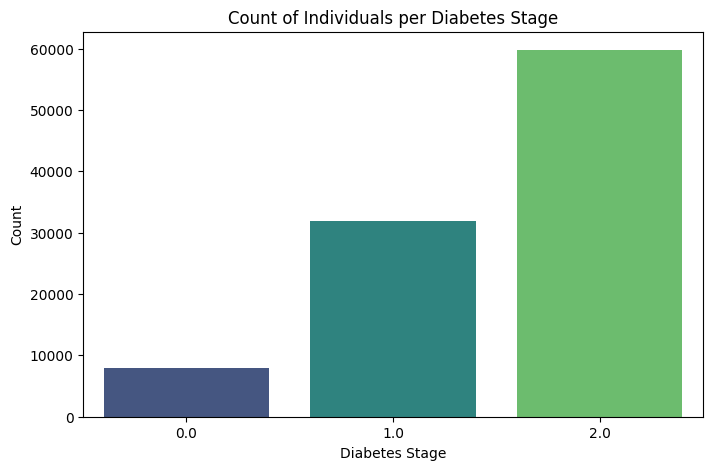

C:\Users\Legion\AppData\Local\Temp\ipykernel_19828\1173409742.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='diagnosed_diabetes', data=df, palette='Set2')


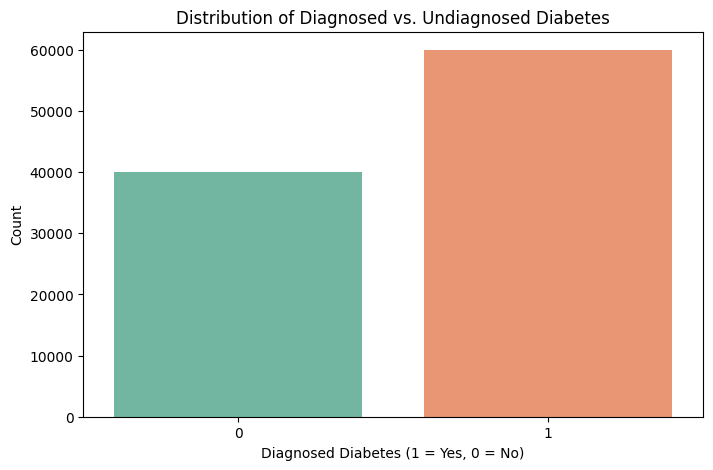

In [8]:
#To show how many individuals fall into each diabetes stage and how many are diagnosed vs. undiagnosed.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv('Process_data\diabetes_final_standardized.csv')  

# Count per diabetes stage
plt.figure(figsize=(8, 5))
sns.countplot(x='diabetes_stage', data=df, palette='viridis')
plt.title('Count of Individuals per Diabetes Stage')
plt.xlabel('Diabetes Stage')
plt.ylabel('Count')
plt.show()

# Diagnosed vs. Undiagnosed
plt.figure(figsize=(8, 5))
sns.countplot(x='diagnosed_diabetes', data=df, palette='Set2')
plt.title('Distribution of Diagnosed vs. Undiagnosed Diabetes')
plt.xlabel('Diagnosed Diabetes (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()


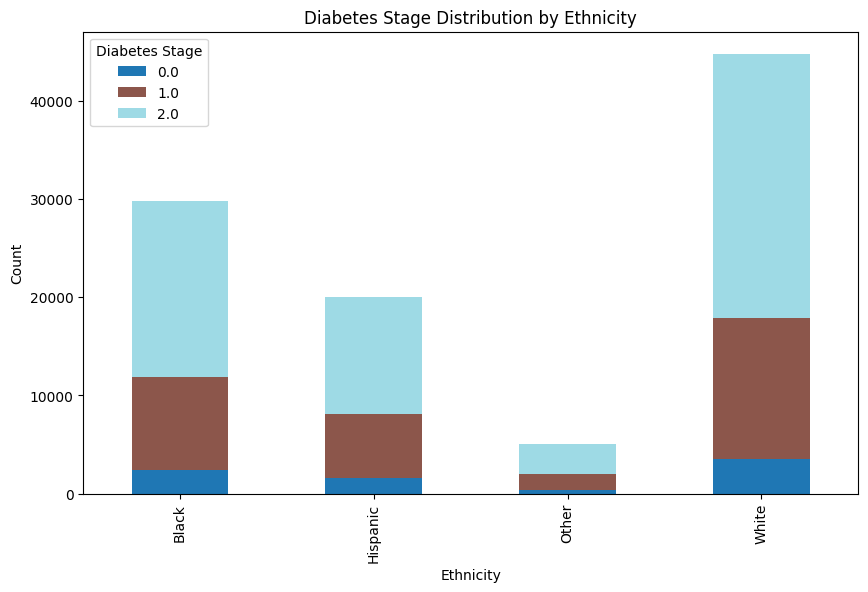

In [9]:
#To show how diabetes stages are distributed across demographic groups like ethnicity, education, income, or employment.
ethnicity_cols = ['ethnicity_Black', 'ethnicity_Hispanic', 'ethnicity_Other', 'ethnicity_White']
df_ethnicity = df.copy()

# Create a single 'ethnicity' column
df_ethnicity['ethnicity'] = df_ethnicity[ethnicity_cols].idxmax(axis=1).str.replace('ethnicity_', '')

# Group and count
stage_ethnicity = df_ethnicity.groupby(['ethnicity', 'diabetes_stage']).size().unstack().fillna(0)

# Plot
stage_ethnicity.plot(kind='bar', stacked=True, colormap='tab20', figsize=(10, 6))
plt.title('Diabetes Stage Distribution by Ethnicity')
plt.xlabel('Ethnicity')
plt.ylabel('Count')
plt.legend(title='Diabetes Stage')
plt.show()


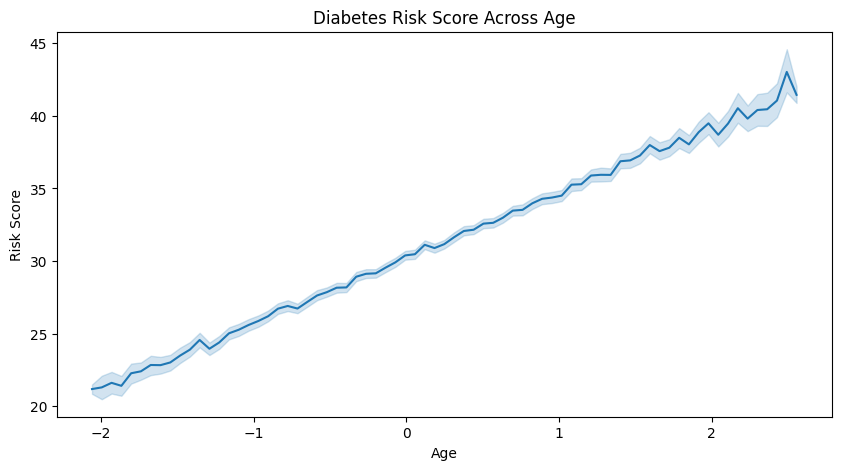

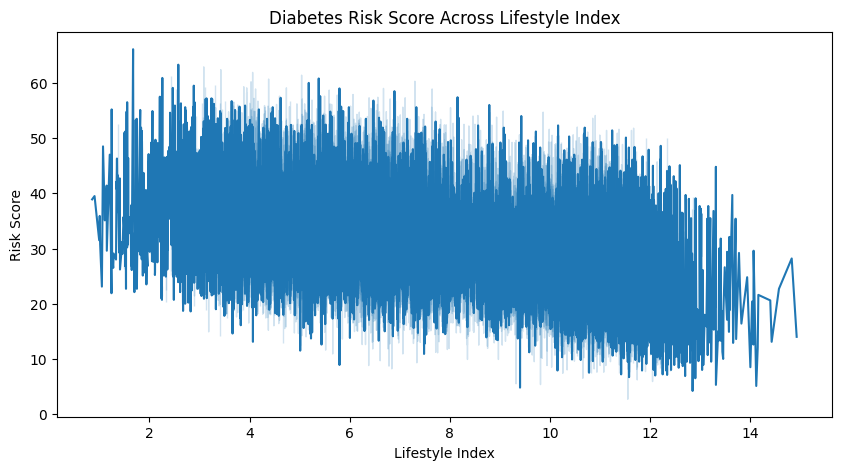

In [10]:
#To show how diabetes risk score trends across age or lifestyle index.

# Line chart: Risk score vs. Age
df_sorted_age = df.sort_values('age')
plt.figure(figsize=(10, 5))
sns.lineplot(x='age', y='diabetes_risk_score', data=df_sorted_age)
plt.title('Diabetes Risk Score Across Age')
plt.xlabel('Age')
plt.ylabel('Risk Score')
plt.show()

# Line chart: Risk score vs. Lifestyle Index
df_sorted_lifestyle = df.sort_values('lifestyle_index')
plt.figure(figsize=(10, 5))
sns.lineplot(x='lifestyle_index', y='diabetes_risk_score', data=df_sorted_lifestyle)
plt.title('Diabetes Risk Score Across Lifestyle Index')
plt.xlabel('Lifestyle Index')
plt.ylabel('Risk Score')
plt.show()


In [11]:
#To compare lifestyle profiles (diet, sleep, exercise, screen time) across diabetes stages.

import plotly.express as px
import plotly.graph_objects as go

# Average lifestyle metrics per diabetes stage
lifestyle_vars = ['diet_score', 'sleep_hours_per_day', 'physical_activity_minutes_per_week', 'screen_time_hours_per_day']
df_radar = df.groupby('diabetes_stage')[lifestyle_vars].mean().reset_index()

# Create radar chart
fig = go.Figure()

for i, row in df_radar.iterrows():
    fig.add_trace(go.Scatterpolar(
        r=row[lifestyle_vars].values,
        theta=lifestyle_vars,
        fill='toself',
        name=f'Stage {int(row["diabetes_stage"])}'
    ))

fig.update_layout(
    polar=dict(radialaxis=dict(visible=True)),
    title='Lifestyle Profile by Diabetes Stage',
    showlegend=True
)
fig.show()


## 🧍 Demographic & Socioeconomic Patterns

<>:7: SyntaxWarning:

invalid escape sequence '\d'

<>:7: SyntaxWarning:

invalid escape sequence '\d'

C:\Users\Legion\AppData\Local\Temp\ipykernel_19828\399377770.py:7: SyntaxWarning:

invalid escape sequence '\d'



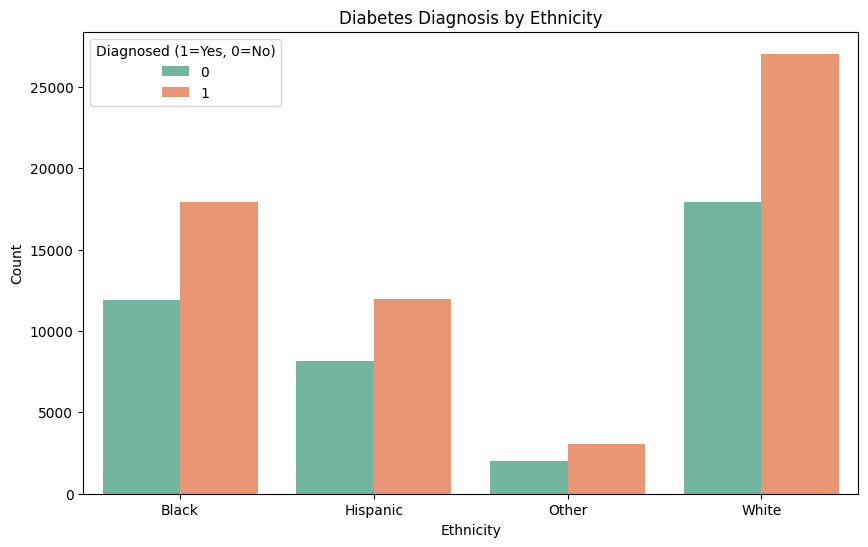

In [12]:
#To compare diabetes prevalence across key demographic groups like ethnicity, income, education, and employment status.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv('Process_data\diabetes_final_standardized.csv')  # Load the dataset

# Create a single ethnicity column
ethnicity_cols = ['ethnicity_Black', 'ethnicity_Hispanic', 'ethnicity_Other', 'ethnicity_White']
df['ethnicity'] = df[ethnicity_cols].idxmax(axis=1).str.replace('ethnicity_', '')

# Grouped bar chart: diabetes prevalence by ethnicity
ethnicity_counts = df.groupby(['ethnicity', 'diagnosed_diabetes']).size().reset_index(name='count')

plt.figure(figsize=(10, 6))
sns.barplot(x='ethnicity', y='count', hue='diagnosed_diabetes', data=ethnicity_counts, palette='Set2')
plt.title('Diabetes Diagnosis by Ethnicity')
plt.xlabel('Ethnicity')
plt.ylabel('Count')
plt.legend(title='Diagnosed (1=Yes, 0=No)')
plt.show()


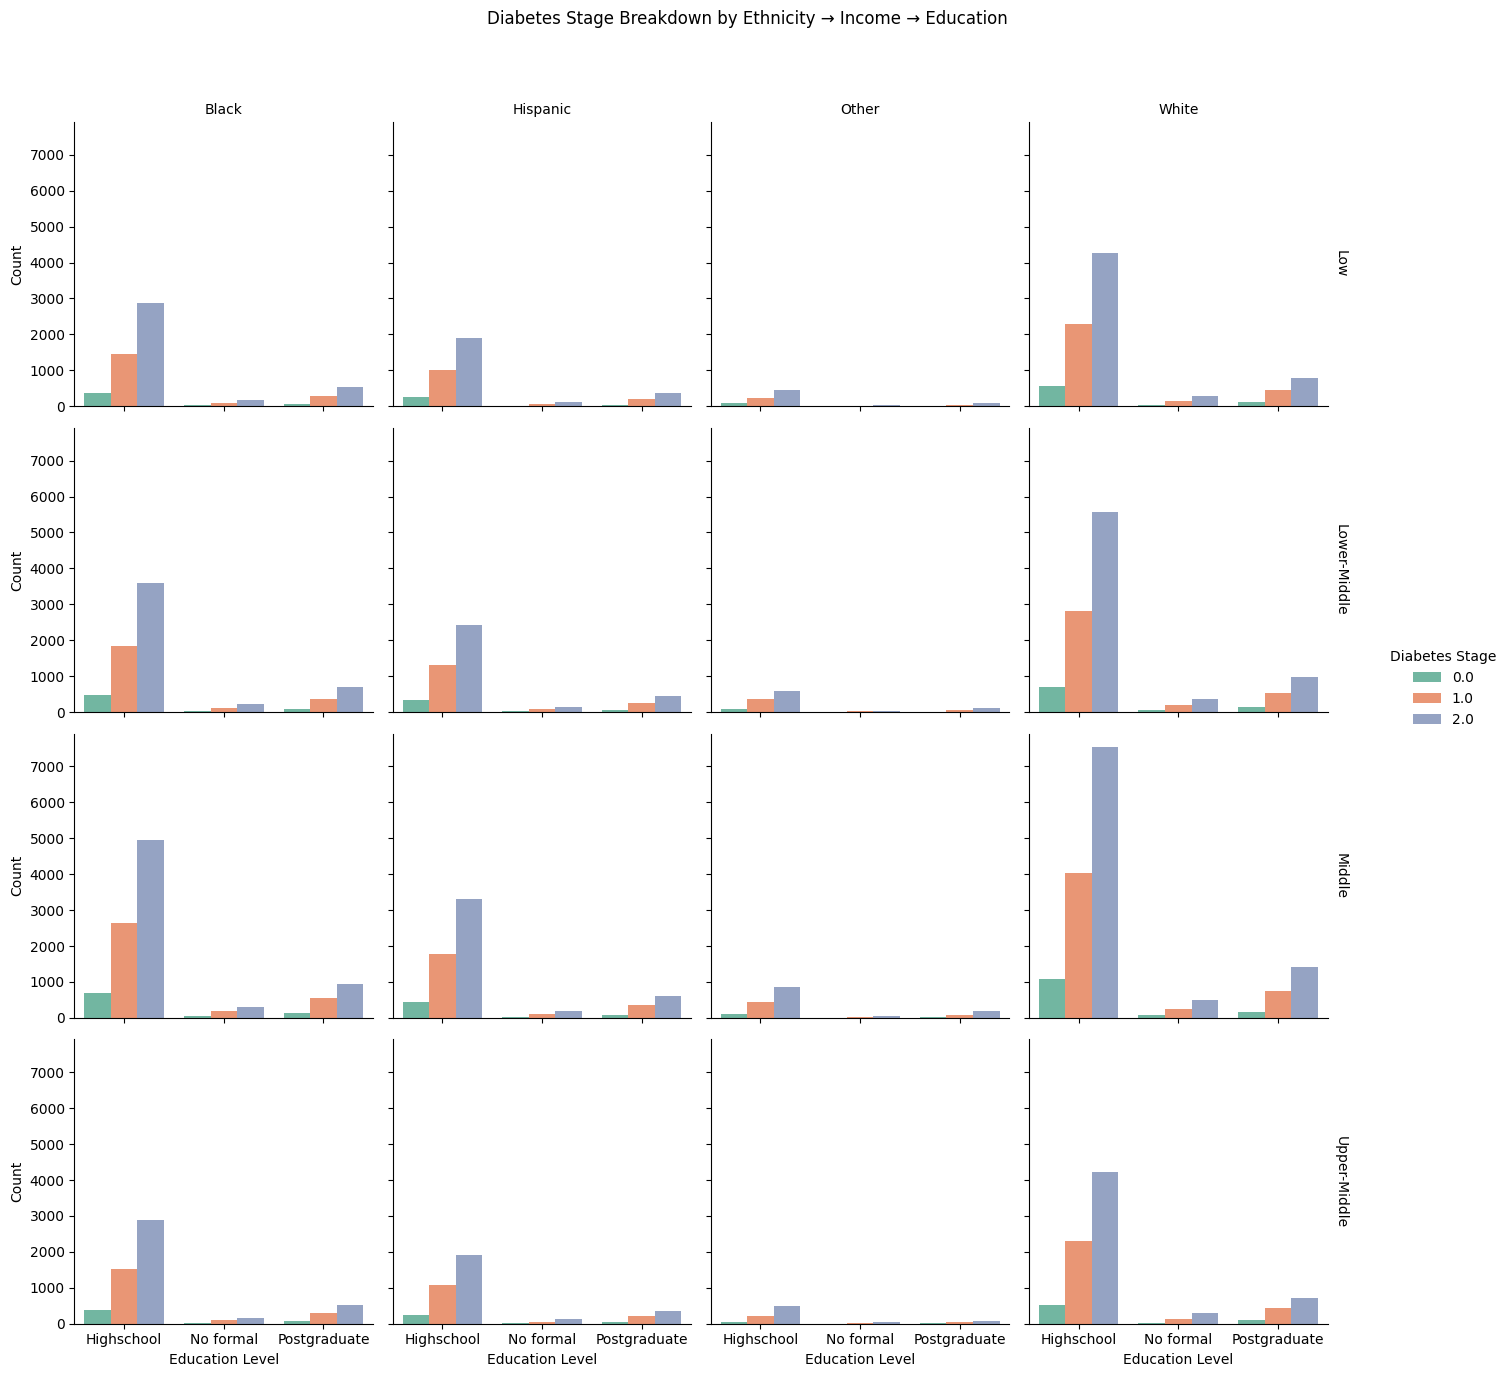

In [13]:
#To show hierarchical relationships between demographics and diabetes stages. Ideal for understanding layered patterns.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create combined demographic columns
ethnicity_cols = ['ethnicity_Black', 'ethnicity_Hispanic', 'ethnicity_Other', 'ethnicity_White']
df['ethnicity'] = df[ethnicity_cols].idxmax(axis=1).str.replace('ethnicity_', '')

education_cols = ['education_level_Highschool', 'education_level_No formal', 'education_level_Postgraduate']
df['education'] = df[education_cols].idxmax(axis=1).str.replace('education_level_', '')

income_cols = ['income_level_Low', 'income_level_Lower-Middle', 'income_level_Middle', 'income_level_Upper-Middle']
df['income'] = df[income_cols].idxmax(axis=1).str.replace('income_level_', '')

# Group and count
grouped = df.groupby(['ethnicity', 'income', 'education', 'diabetes_stage']).size().reset_index(name='count')

# Plot using FacetGrid
g = sns.FacetGrid(grouped, col='ethnicity', row='income', margin_titles=True, height=3.5)
g.map_dataframe(sns.barplot, x='education', y='count', hue='diabetes_stage', palette='Set2')
g.set_axis_labels("Education Level", "Count")
g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.add_legend(title='Diabetes Stage')
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Diabetes Stage Breakdown by Ethnicity → Income → Education")
plt.show()


<Figure size 1000x600 with 0 Axes>

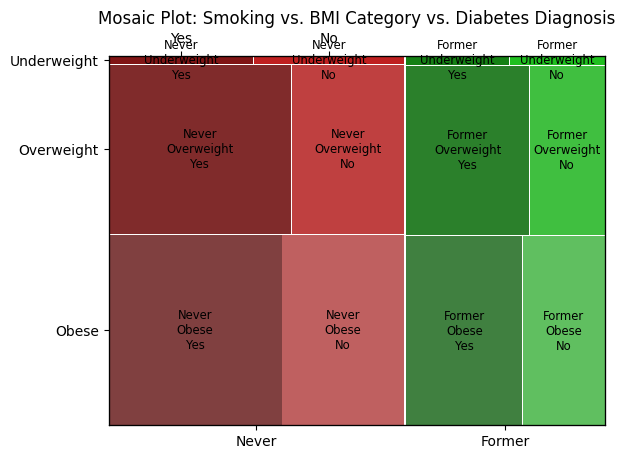

In [14]:
#To visualize relationships between categorical variables like smoking status, BMI category, and diabetes diagnosis.

from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt

# Create categorical columns
df['smoking'] = df[['smoking_status_Former', 'smoking_status_Never']].idxmax(axis=1).str.replace('smoking_status_', '')
df['bmi_cat'] = df[['bmi_category_Obese', 'bmi_category_Overweight', 'bmi_category_Underweight']].idxmax(axis=1).str.replace('bmi_category_', '')
df['diagnosed'] = df['diagnosed_diabetes'].map({0: 'No', 1: 'Yes'})

# Mosaic plot
plt.figure(figsize=(10, 6))
mosaic(df, ['smoking', 'bmi_cat', 'diagnosed'])
plt.title('Mosaic Plot: Smoking vs. BMI Category vs. Diabetes Diagnosis')
plt.show()


## 🏃 Lifestyle Behavior Analysis

<>:6: SyntaxWarning:

invalid escape sequence '\d'

<>:6: SyntaxWarning:

invalid escape sequence '\d'

C:\Users\Legion\AppData\Local\Temp\ipykernel_19828\2664691482.py:6: SyntaxWarning:

invalid escape sequence '\d'



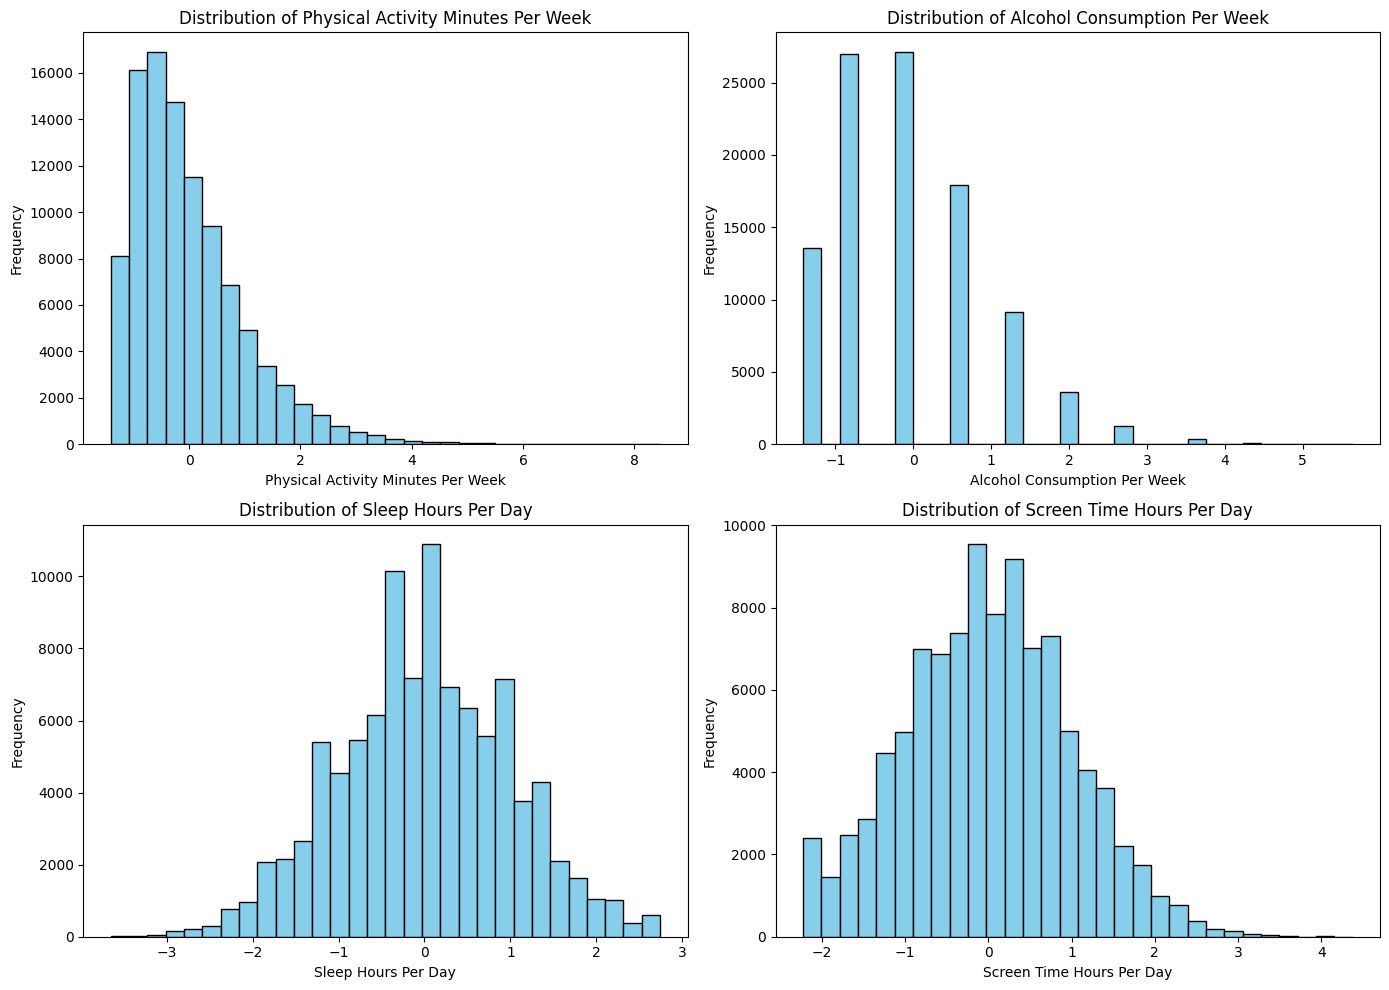

In [15]:
#To show the distribution of lifestyle behaviors such as physical activity, alcohol consumption, sleep hours, and screen time. This helps identify common patterns and outliers.

import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('Process_data\diabetes_final_standardized.csv')  # Load the dataset

# List of lifestyle variables
lifestyle_vars = [
    'physical_activity_minutes_per_week',
    'alcohol_consumption_per_week',
    'sleep_hours_per_day',
    'screen_time_hours_per_day'
]

# Plot histograms
plt.figure(figsize=(14, 10))
for i, var in enumerate(lifestyle_vars, 1):
    plt.subplot(2, 2, i)
    plt.hist(df[var], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {var.replace("_", " ").title()}')
    plt.xlabel(var.replace("_", " ").title())
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


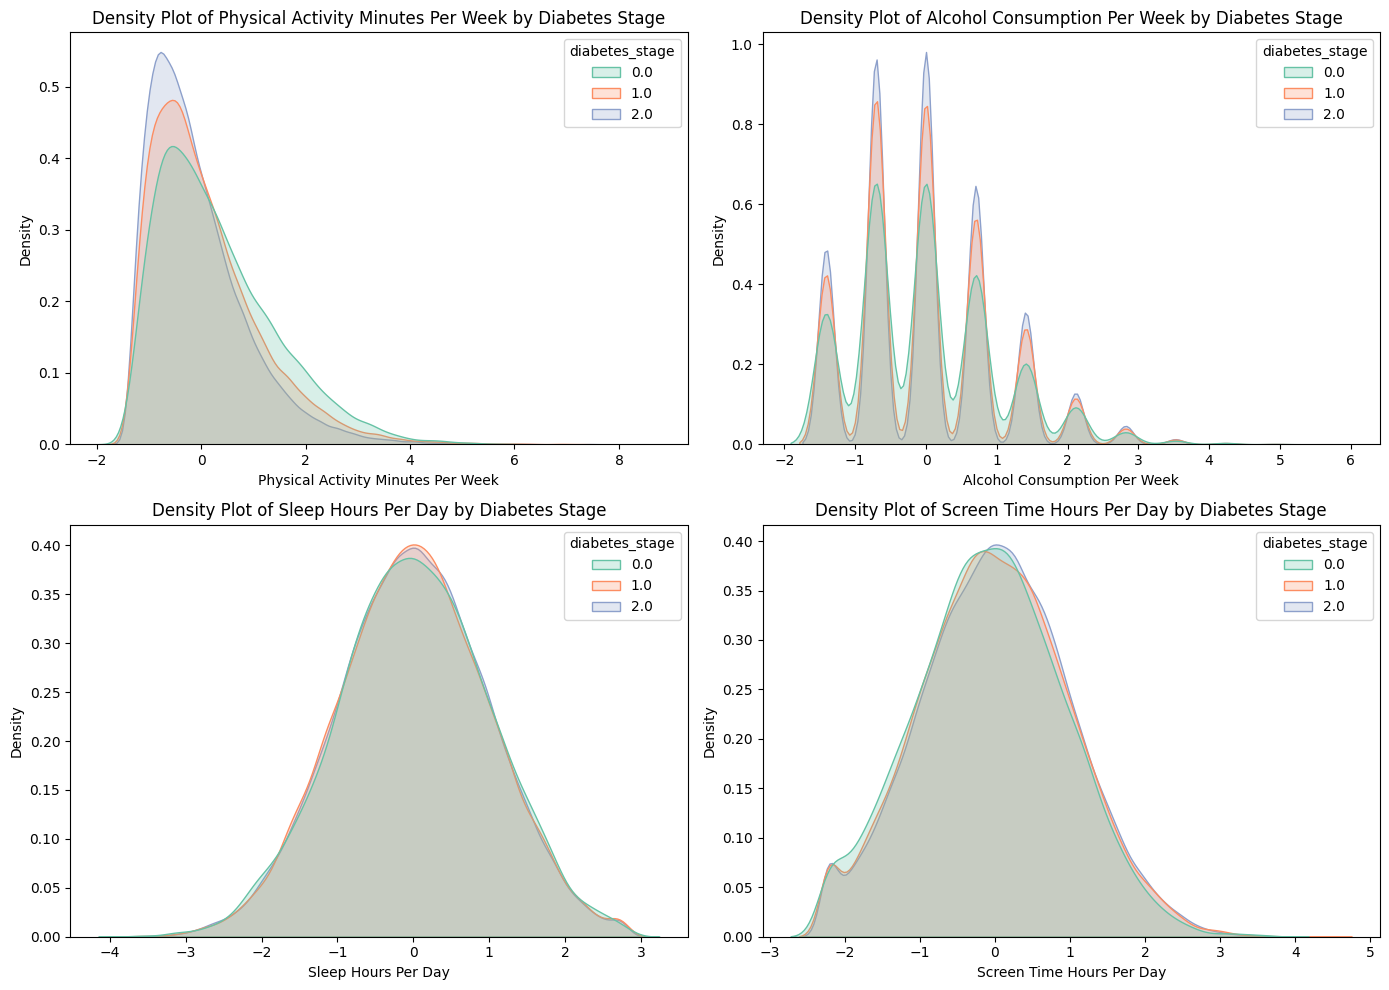

In [16]:
#To visualize the smooth distribution of lifestyle variables. These plots are useful for comparing distributions across diabetes stages.

import seaborn as sns

# Density plots for each lifestyle variable
plt.figure(figsize=(14, 10))
for i, var in enumerate(lifestyle_vars, 1):
    plt.subplot(2, 2, i)
    sns.kdeplot(data=df, x=var, hue='diabetes_stage', fill=True, common_norm=False, palette='Set2')
    plt.title(f'Density Plot of {var.replace("_", " ").title()} by Diabetes Stage')
    plt.xlabel(var.replace("_", " ").title())
    plt.ylabel('Density')

plt.tight_layout()
plt.show()


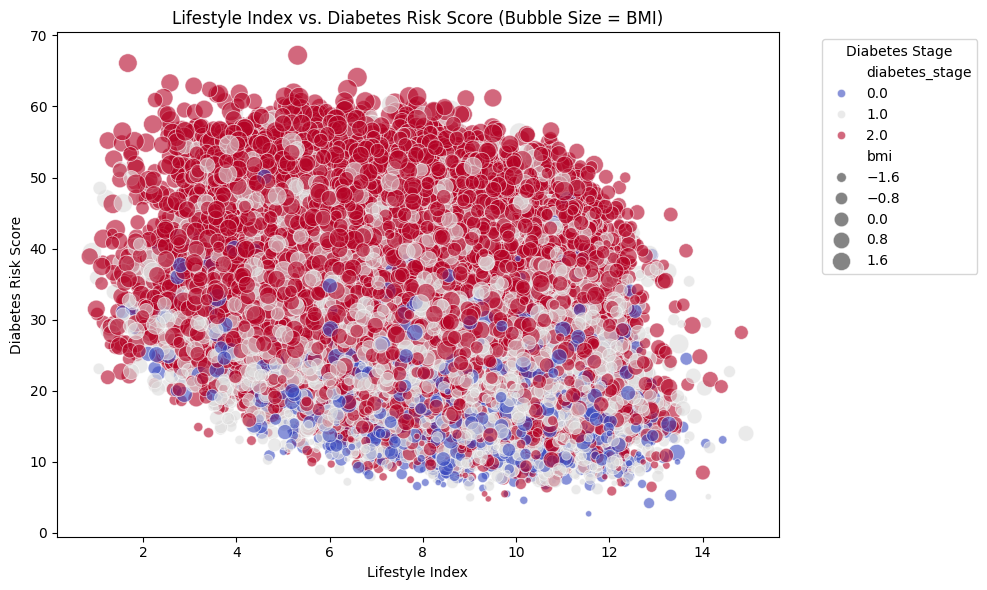

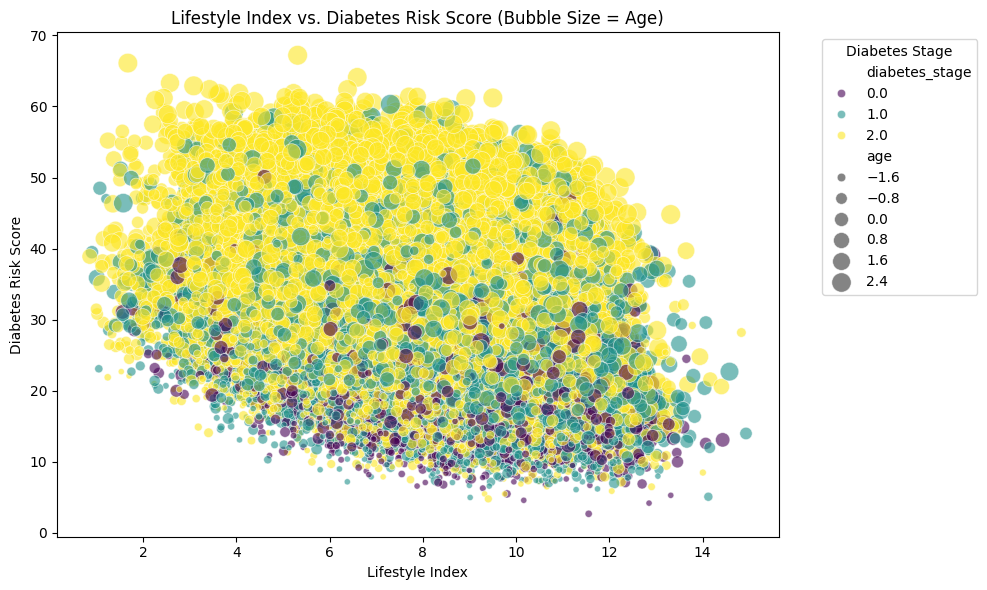

In [17]:
#To explore the relationship between lifestyle index and diabetes risk score, with bubble size representing BMI or age. This reveals clustering and impact of lifestyle on risk.

# Bubble chart: Lifestyle Index vs. Risk Score, bubble size = BMI
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='lifestyle_index',
    y='diabetes_risk_score',
    size='bmi',
    hue='diabetes_stage',
    data=df,
    palette='coolwarm',
    sizes=(20, 200),
    alpha=0.6
)
plt.title('Lifestyle Index vs. Diabetes Risk Score (Bubble Size = BMI)')
plt.xlabel('Lifestyle Index')
plt.ylabel('Diabetes Risk Score')
plt.legend(title='Diabetes Stage', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Bubble chart: Lifestyle Index vs. Risk Score, bubble size = Age
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='lifestyle_index',
    y='diabetes_risk_score',
    size='age',
    hue='diabetes_stage',
    data=df,
    palette='viridis',
    sizes=(20, 200),
    alpha=0.6
)
plt.title('Lifestyle Index vs. Diabetes Risk Score (Bubble Size = Age)')
plt.xlabel('Lifestyle Index')
plt.ylabel('Diabetes Risk Score')
plt.legend(title='Diabetes Stage', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## 🩺 Clinical Risk Factors

<>:6: SyntaxWarning:

invalid escape sequence '\d'

<>:6: SyntaxWarning:

invalid escape sequence '\d'

C:\Users\Legion\AppData\Local\Temp\ipykernel_19828\3233077145.py:6: SyntaxWarning:

invalid escape sequence '\d'



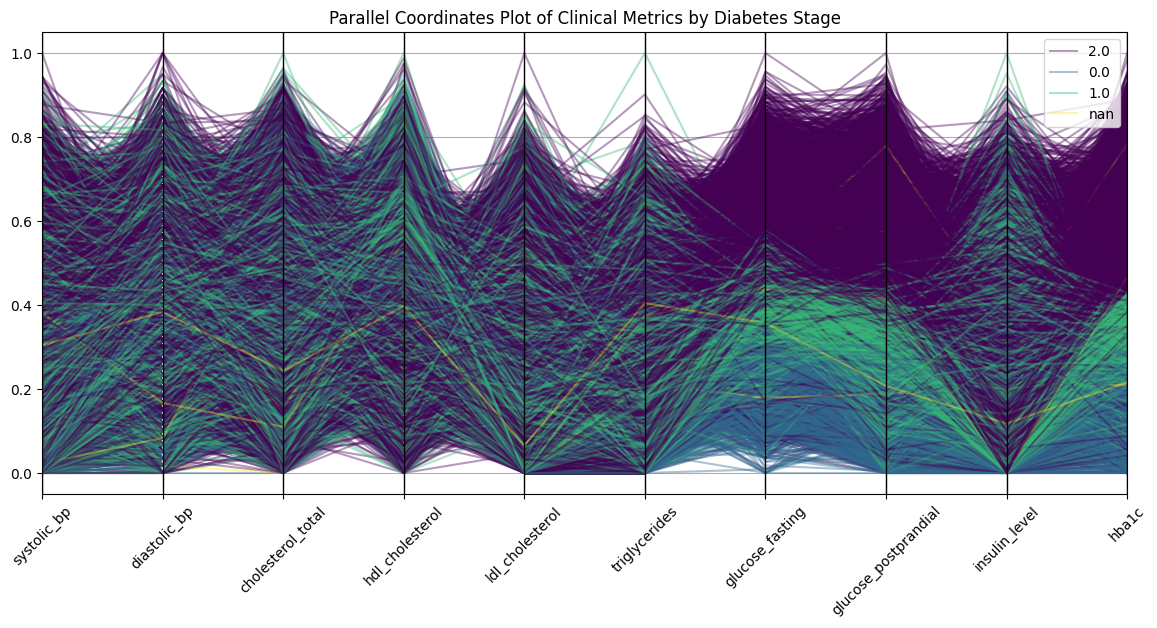

In [18]:
#To visualize multiple clinical metrics (blood pressure, cholesterol, glucose, insulin) across diabetes stages. This helps identify patterns and clusters among individuals.

import pandas as pd
from pandas.plotting import parallel_coordinates
import matplotlib.pyplot as plt
df=pd.read_csv('Process_data\diabetes_final_standardized.csv')  # Load the dataset

# Select relevant clinical features
clinical_vars = [
    'systolic_bp', 'diastolic_bp', 'cholesterol_total',
    'hdl_cholesterol', 'ldl_cholesterol', 'triglycerides',
    'glucose_fasting', 'glucose_postprandial', 'insulin_level', 'hba1c'
]

# Normalize for better visual comparison
df_norm = df.copy()
df_norm[clinical_vars] = (df_norm[clinical_vars] - df_norm[clinical_vars].min()) / (df_norm[clinical_vars].max() - df_norm[clinical_vars].min())
df_norm['diabetes_stage'] = df['diabetes_stage'].astype(str)

# Plot
plt.figure(figsize=(14, 6))
parallel_coordinates(df_norm[['diabetes_stage'] + clinical_vars], 'diabetes_stage', colormap='viridis', alpha=0.4)
plt.title('Parallel Coordinates Plot of Clinical Metrics by Diabetes Stage')
plt.xticks(rotation=45)
plt.show()


## 🧩 Advanced & Interactive Visuals


<>:8: SyntaxWarning:

invalid escape sequence '\d'

<>:8: SyntaxWarning:

invalid escape sequence '\d'

C:\Users\Legion\AppData\Local\Temp\ipykernel_19828\1332473590.py:8: SyntaxWarning:

invalid escape sequence '\d'



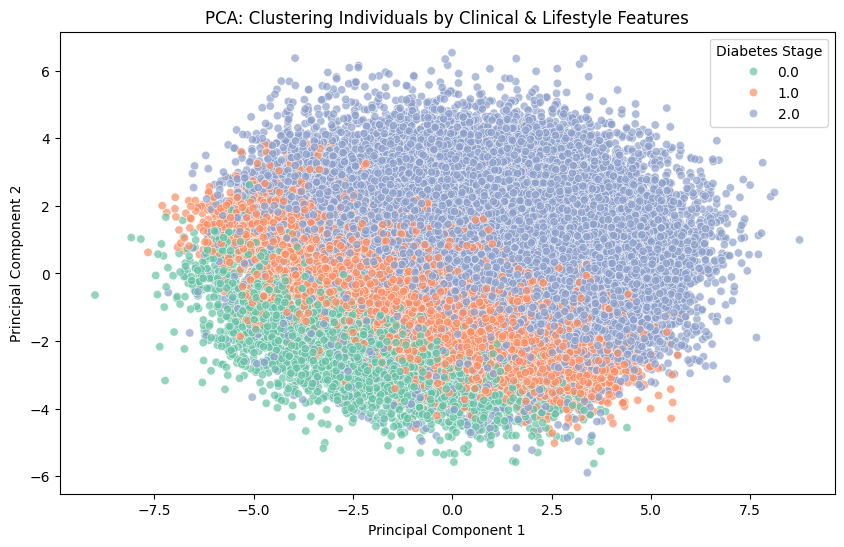

In [21]:
#To reduce high-dimensional data into 2D space for visualizing clusters of individuals based on all features. This helps reveal natural groupings by diabetes stage or risk.

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
df=pd.read_csv('Process_data\diabetes_final_standardized.csv')  # Load the dataset

# Select numeric features only (excluding target and one-hot columns)
exclude_cols = ['diabetes_stage', 'diagnosed_diabetes']
numeric_cols = df.select_dtypes(include='number').columns.difference(exclude_cols)
X = df[numeric_cols]

# Standardize features
X_scaled = StandardScaler().fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

# Create DataFrame for plotting
df_pca = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
df_pca['diabetes_stage'] = df['diabetes_stage']

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='diabetes_stage', palette='Set2', alpha=0.7)
plt.title('PCA: Clustering Individuals by Clinical & Lifestyle Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Diabetes Stage')
plt.show()


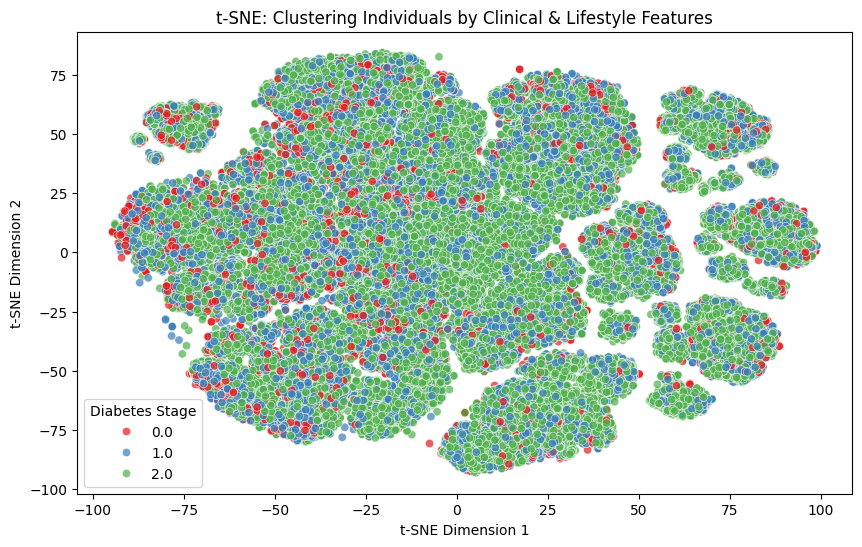

In [22]:
from sklearn.manifold import TSNE

# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_result = tsne.fit_transform(X_scaled)

# Create DataFrame for plotting
df_tsne = pd.DataFrame(tsne_result, columns=['TSNE1', 'TSNE2'])
df_tsne['diabetes_stage'] = df['diabetes_stage']

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_tsne, x='TSNE1', y='TSNE2', hue='diabetes_stage', palette='Set1', alpha=0.7)
plt.title('t-SNE: Clustering Individuals by Clinical & Lifestyle Features')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend(title='Diabetes Stage')
plt.show()


c:\Users\Legion\Desktop\Diabetes_Data\.venv\Lib\site-packages\matplotlib\collections.py:996: RuntimeWarning:

invalid value encountered in sqrt



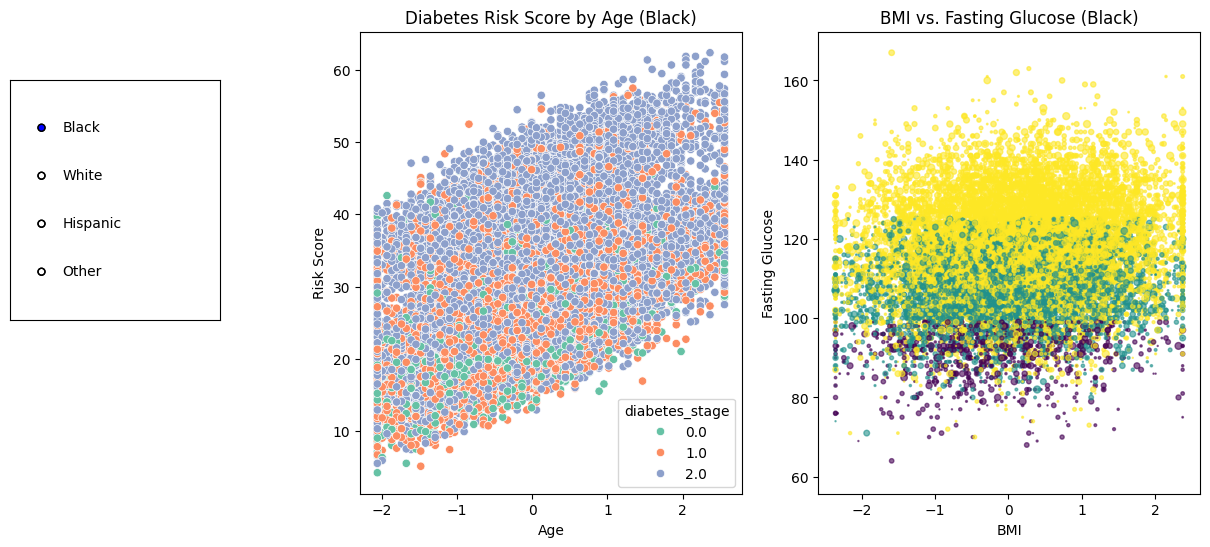

In [24]:
#To combine multiple charts into a dynamic dashboard that allows filtering by age, gender, ethnicity, etc. Perfect for stakeholder engagement and exploratory analysis.

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.widgets import RadioButtons
import seaborn as sns

# Load dataset
df = pd.read_csv('Process_data/diabetes_final_standardized.csv')

# Create ethnicity column
ethnicity_cols = ['ethnicity_Black', 'ethnicity_Hispanic', 'ethnicity_Other', 'ethnicity_White']
df['ethnicity'] = df[ethnicity_cols].idxmax(axis=1).str.replace('ethnicity_', '')

# Initial ethnicity
initial_ethnicity = df['ethnicity'].unique()[0]

# Create figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
plt.subplots_adjust(left=0.3)

# Radio buttons for ethnicity filter
ax_radio = plt.axes([0.05, 0.4, 0.15, 0.4])
radio = RadioButtons(ax_radio, df['ethnicity'].unique(), active=0)

def update_dashboard(selected_ethnicity):
    filtered_df = df[df['ethnicity'] == selected_ethnicity]

    # Clear previous plots
    ax1.clear()
    ax2.clear()

    # Plot 1: Age vs. Diabetes Risk Score
    sns.scatterplot(data=filtered_df, x='age', y='diabetes_risk_score', hue='diabetes_stage', ax=ax1, palette='Set2')
    ax1.set_title(f'Diabetes Risk Score by Age ({selected_ethnicity})')
    ax1.set_xlabel('Age')
    ax1.set_ylabel('Risk Score')

    # Plot 2: BMI vs. Glucose Fasting (Bubble Size = Age)
    scatter = ax2.scatter(
        filtered_df['bmi'], filtered_df['glucose_fasting'],
        s=filtered_df['age'] * 10, c=filtered_df['diabetes_stage'], cmap='viridis', alpha=0.6
    )
    ax2.set_title(f'BMI vs. Fasting Glucose ({selected_ethnicity})')
    ax2.set_xlabel('BMI')
    ax2.set_ylabel('Fasting Glucose')

    fig.canvas.draw_idle()

# Initial plot
update_dashboard(initial_ethnicity)

# Connect radio button to update function
radio.on_clicked(update_dashboard)

plt.show()
